# Analyzing Metric on Different Models

We evaluated the performance of Gemma, Gemma2, Phi-mini3, and Llama3 in extracting humorous quotes from transcripts. Among these models, Gemma2 achieved the highest overall performance with a score of 35.2%, followed closely by Llama3 with a score of 31.9%. Phi-mini3 exhibited the lowest performance, with an average score of 26.5%. Notably, Gemma2 and Llama3 attained the highest score for an individual comedian's transcript, surpassing 70%.

#### Imports

In [2]:
import sys
import pandas as pd
sys.path.append("..")
import seaborn as sns
import nltk
from thefuzz import fuzz
import matplotlib.pyplot as plt

from humor.bipartite_metric import bipartite_metric

In [3]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
gemma = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma_answers.csv')
phi_model = pd.read_csv("/home/ada/humor/data/stand_up_dataset/phi3_mini_quotes.csv")
gemma2 = pd.read_csv("/home/ada/humor/data/stand_up_dataset/gemma2_2 - gemma2 - gemma2.csv")
llama = pd.read_csv("/home/ada/humor/data/stand_up_dataset/llama - llama.csv")

#### Experiment

In [4]:
gemma_metric = bipartite_metric(gemma, ground_truth)
print("Gemma Model:", gemma_metric.select_dtypes(include='number').mean())

phi_metric = bipartite_metric(phi_model, ground_truth)
print("Phi Model:", phi_metric.select_dtypes(include='number').mean())

gemma2_metric = bipartite_metric(gemma2, ground_truth)
print("Gemma2 Model:", gemma2_metric.select_dtypes(include='number').mean())

llama_metric = bipartite_metric(llama, ground_truth)
print("Llama Model:",llama_metric.select_dtypes(include='number').mean())

Gemma Model: score    30.08505
dtype: float64
Phi Model: score    26.455392
dtype: float64
Gemma2 Model: score    27.098347
dtype: float64
Llama Model: score    31.878605
dtype: float64


<Figure size 500x500 with 0 Axes>

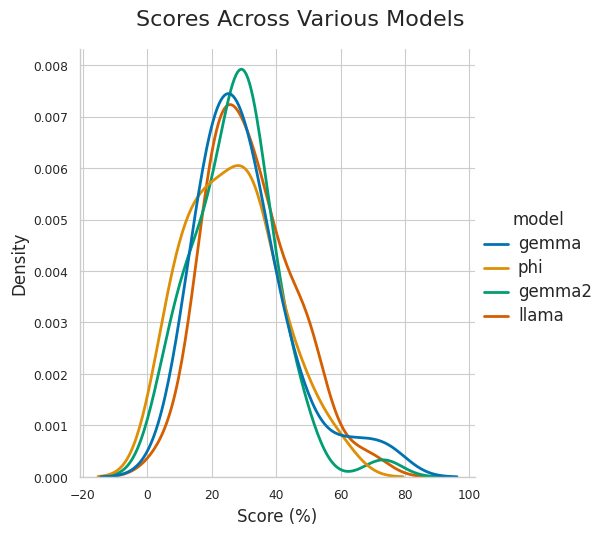

In [6]:
gemma = gemma_metric.assign(model="gemma")
phi = phi_metric.assign(model="phi")
gemma2 = gemma2_metric.assign(model = "gemma2")
llama = llama_metric.assign(model = "llama")

sns.set_style("whitegrid")
sns.set_context("paper")
plt.figure(figsize=(5, 5))  
sns.set_palette("colorblind")

df = pd.concat([gemma, phi, gemma2, llama]).reset_index(drop=True)

plot = sns.displot(
    df, x="score", hue="model", kind="kde",
    linewidth=2 
)

plot.fig.suptitle("Scores Across Various Models", fontsize=16, y=1.05)  
plot.set_axis_labels("Score (%)", "Density", fontsize=12)

plot._legend.get_title().set_fontsize(12) 
for text in plot._legend.texts:
    text.set_fontsize(12) 

plot.savefig("experiment_02.png")
plt.show()